In [1]:
import numpy as np
import torch
from torch import nn

In [2]:
import pandas as pd
mnist_train=pd.read_csv("D:\msc_dwm_lab_2024\MNIST\mnist_train.csv")
mnist_test=pd.read_csv("D:\msc_dwm_lab_2024\MNIST\mnist_test.csv")

In [3]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(mnist_train.shape,mnist_test.shape)

(60000, 785) (10000, 785)


In [5]:
X_train=mnist_train.iloc[:,1:]
y_train=mnist_train.iloc[:,0]

In [6]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [7]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)

In [9]:
X_test=mnist_test.iloc[:,1:]
y_test=mnist_test.iloc[:,0]
#y_test = label_encoder.fit_transform(y_test)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [11]:
X_test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert Train DataFrames to numpy arrays and reshape images
images_np = X_train.to_numpy().reshape(-1, 1, 28, 28)
labels_np = y_train.to_numpy().squeeze()

# Convert to tensors
images_tensor = torch.tensor(images_np, dtype=torch.float32)
labels_tensor = torch.tensor(labels_np, dtype=torch.long)

# Normalize images by dividing by 255
images_tensor /= 255.0

# Create Dataset and DataLoader with batch size 16
mnist_dataset = TensorDataset(images_tensor, labels_tensor)
train_dataloader = DataLoader(mnist_dataset, batch_size=16, shuffle=True)

# Example of getting one batch
for batch_images, batch_labels in train_dataloader:
    print(batch_images.shape)  # torch.Size([16, 1, 28, 28])
    print(batch_labels.shape)  # torch.Size([16])
    break  # just to check one batch


torch.Size([16, 1, 28, 28])
torch.Size([16])


In [13]:
labels_np.shape

(60000,)

In [14]:
y_train.shape

(60000,)

In [15]:
# Convert Test DataFrames to numpy arrays and reshape images
images_np_test = X_test.to_numpy().reshape(-1, 1, 28, 28)
labels_np_test = y_test.to_numpy().squeeze()

# Convert to tensors
images_tensor_test = torch.tensor(images_np_test, dtype=torch.float32)
labels_tensor_test = torch.tensor(labels_np_test, dtype=torch.long)

# Normalize images by dividing by 255
images_tensor_test /= 255.0

# Create Dataset and DataLoader with batch size 16
mnist_dataset = TensorDataset(images_tensor_test, labels_tensor_test)
test_dataloader = DataLoader(mnist_dataset, batch_size=16, shuffle=False)

# Example of getting one batch
for batch_images, batch_labels in test_dataloader:
    print(batch_images.shape)  # torch.Size([16, 1, 28, 28])
    print(batch_labels.shape)  # torch.Size([16])
    break  # just to check one batch


torch.Size([16, 1, 28, 28])
torch.Size([16])


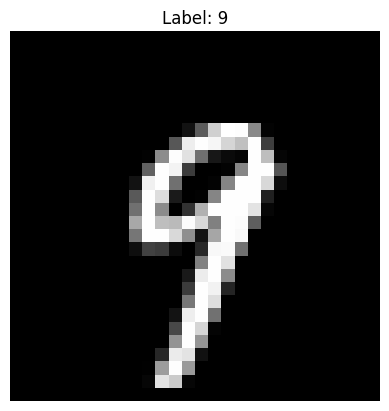

In [16]:
import matplotlib.pyplot as plt

for batch_images, batch_labels in train_dataloader:
    img = batch_images[0].squeeze()  # remove channel dim (1,28,28) -> (28,28)
    img_np = img.numpy()
    plt.imshow(img_np, cmap='gray')
    plt.title(f"Label: {batch_labels[0].item()}")
    plt.axis('off')
    plt.show()
    break  # only display one image


In [ ]:
# for X,y in train_dataloader:
#     print(X.shape)
#     print(y.shape)

In [17]:
import torch
import torch.optim as optim

import torch.nn as nn
# Define/Instantiate/Declare a CNN model for MNIST using Sequential
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='same'),  
    # 1 input channel, 32 output channels
    #convolution will apply 32 different filters to the input with 1 channel, 
    # producing an output with 32 channels (feature maps).
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Downsample to 14x14

    #size of feature map=14X14
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='same'), 
    #prev layer outputs 32 feature maps
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Downsample to 7x7
    nn.Flatten(),  # Flatten feature maps to vector
    #prev layer outputs 64 feature maps of size 7X7
    # -->need correct calculation here
    nn.Linear(64 * 7 * 7, 128),  # Fully connected layer
    nn.ReLU(),
    nn.Linear(128, 10),  # 10 classes for MNIST digits
    #nn.Softmax(dim=1)  # Softmax activation over the classes
)

In [18]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Training for 3 epochs
num_epochs = 3
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_dataloader.dataset)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/3, Loss: 0.1277
Epoch 2/3, Loss: 0.0433
Epoch 3/3, Loss: 0.0289


In [ ]:
# Evaluation on test dataset
import torch.nn.functional as F
model.eval()
all_probs = [] #to collect all predicted probabilities 
all_preds = [] #predicted class indices, and 
all_labels = [] #true labels across batches
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        #torch.max(outputs, 1) computes the maximum value and 
        # its index along dimension 1 (the class dimension)
        probs = F.softmax(outputs, dim=1) #apply class label dim
        all_probs.append(probs.cpu().numpy())
        all_preds.append(preds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)
all_probs = np.vstack(all_probs)

In [ ]:
#output of 10 neurons from last linear layer of nn model
outputs.shape 

torch.Size([16, 10])

In [ ]:
#true labels
all_labels

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [ ]:
#predicted labels
all_preds 

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [ ]:
all_probs 

array([[2.44894036e-11, 4.13630730e-09, 2.03021400e-09, ...,
        9.99992967e-01, 2.13080845e-10, 6.82480731e-06],
       [3.43676288e-06, 5.82068708e-07, 9.99995947e-01, ...,
        7.12747639e-10, 3.69300790e-09, 5.46846693e-13],
       [4.79395048e-08, 9.99991298e-01, 1.67362032e-07, ...,
        8.78709045e-07, 1.56454234e-06, 3.66965480e-07],
       ...,
       [4.86667373e-11, 9.74209158e-09, 1.60582624e-11, ...,
        6.70599078e-08, 1.37281063e-07, 3.75118793e-06],
       [3.47619294e-10, 1.72745762e-09, 7.87552261e-13, ...,
        1.07591456e-08, 8.12712125e-04, 4.37098515e-06],
       [1.03554354e-04, 3.63913017e-07, 3.00635656e-06, ...,
        2.45772125e-10, 1.12338439e-05, 1.14298317e-07]],
      shape=(10000, 10), dtype=float32)

In [ ]:
all_probs_df=pd.DataFrame(all_probs)

In [ ]:
all_probs_df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.448940e-11,4.136307e-09,2.030214e-09,1.721823e-07,6.580635e-11,2.487791e-10,2.239619e-15,9.999930e-01,2.130808e-10,6.824807e-06
1,3.436763e-06,5.820687e-07,9.999959e-01,4.022581e-11,1.338076e-11,1.931195e-13,2.221800e-09,7.127476e-10,3.693008e-09,5.468467e-13
2,4.793950e-08,9.999913e-01,1.673620e-07,1.276239e-09,4.852251e-06,2.251341e-08,8.691463e-07,8.787090e-07,1.564542e-06,3.669655e-07
3,9.997944e-01,1.800918e-09,8.964992e-08,1.799129e-09,1.158753e-09,6.304207e-08,2.050545e-04,5.801925e-09,2.554443e-07,1.691379e-07
4,1.052153e-05,1.223228e-07,5.974421e-06,5.502178e-10,9.998802e-01,4.745185e-09,1.284607e-07,1.904697e-07,6.256212e-07,1.021498e-04


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 975    0    0    1    0    0    3    0    1    0]
 [   0 1130    0    1    0    0    4    0    0    0]
 [   3    0 1010    4    1    0    0   10    4    0]
 [   0    0    0 1008    0    0    0    0    2    0]
 [   0    0    0    0  971    0    0    0    0   11]
 [   1    0    0   23    0  864    3    0    1    0]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    2    1    3    0    0    0 1017    0    5]
 [   3    0    0    1    0    0    0    1  967    2]
 [   0    0    0    1    3    0    0    0    1 1004]]


In [ ]:
from sklearn.metrics import classification_report
# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# For ROC and AUC - binarize the labels for multi-class
from sklearn.preprocessing import label_binarize
n_classes = 10
all_labels_bin = label_binarize(all_labels, classes=range(n_classes))

In [ ]:
all_labels_bin

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10000, 10))

In [ ]:
# import torch.nn.functional as F
# all_probs = []
# model.eval()
# with torch.no_grad():
#     for images, _ in test_dataloader:
#         images = images.to(device)
#         outputs = model(images)
#         probs = F.softmax(outputs, dim=1)
#         all_probs.append(probs.cpu().numpy())

# all_probs = np.vstack(all_probs)

In [ ]:
all_probs.shape

(10000, 10)

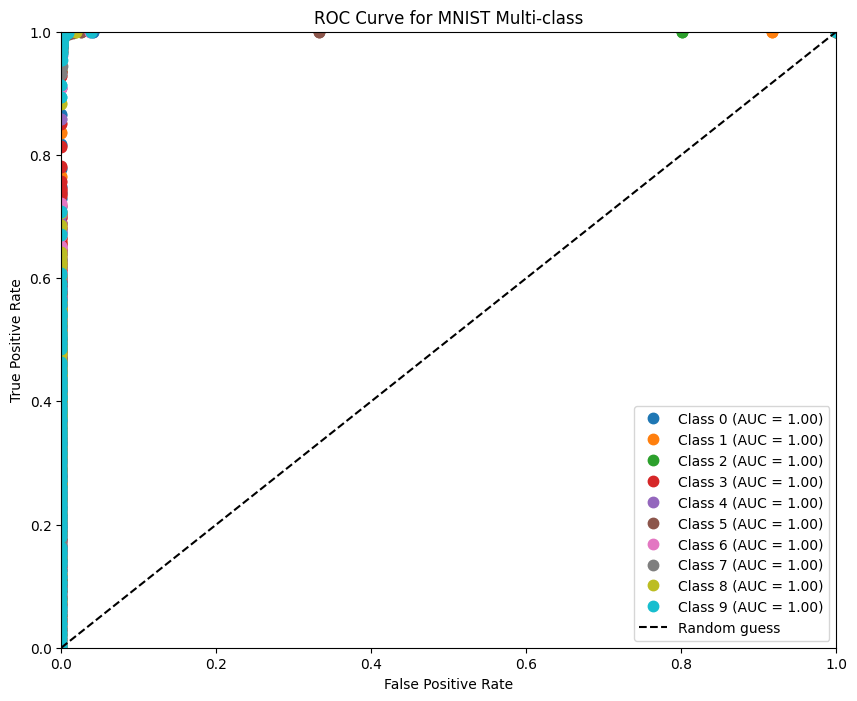

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot ROC curve and compute AUC for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', linestyle='None', markersize=15,label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST Multi-class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
torch.save(model.state_dict(),'mnist_model_24_8_25.pth')

In [ ]:
model.load_state_dict(torch.load('mnist_model_24_8_25.pth', weights_only=True),strict=False)

<All keys matched successfully>